## perceptron


In [44]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron()

per_clf.fit(X, y)
per_clf.predict([[2, 0.5]])

array([0])

## tensorflow


In [45]:
import tensorflow as tf

tf.__version__

'2.20.0'

In [46]:
import keras


keras.__version__

'3.12.1'

## clasification


In [47]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [48]:
X_train_full.shape

(60000, 28, 28)

In [49]:
X_train_full.dtype

dtype('uint8')

In [50]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [51]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [52]:
class_names[y_train[0]]

'Coat'

In [53]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# model = keras.models.Sequential(
# [
# keras.layers.Flatten(input_shape=[28, 28]),
# keras.layers.Dense(300, activation="relu"),
# keras.layers.Dense(100, activation="relu"),
# keras.layers.Dense(10, activation="softmax"),
# ]
# )

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_16, built=True>,
 <Dense name=dense_17, built=True>,
 <Dense name=dense_18, built=True>]

In [56]:
hidden1 = model.layers[1]

In [57]:
model.get_layer("dense_2").name

ValueError: No such layer: dense_2. Existing layers are: ['flatten_1', 'dense_16', 'dense_17', 'dense_18'].

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00524125, -0.04230735, -0.06200692, ...,  0.02676981,
         0.00598785, -0.03719912],
       [ 0.05673306, -0.01684777,  0.04193715, ..., -0.06806128,
        -0.00543834, -0.03418425],
       [-0.06162966,  0.00699457,  0.00407832, ...,  0.03516675,
         0.05585358, -0.05613731],
       ...,
       [ 0.00315216, -0.02215669,  0.01078662, ...,  0.00472776,
        -0.01053728, -0.04725473],
       [ 0.0726454 , -0.06503746, -0.04728651, ..., -0.06735171,
        -0.07354446, -0.01213491],
       [-0.05987496,  0.06203599, -0.0312662 , ..., -0.00661807,
         0.02193685, -0.00419629]], shape=(784, 300), dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7675 - loss: 0.6969 - val_accuracy: 0.8160 - val_loss: 0.5194
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8321 - loss: 0.4817 - val_accuracy: 0.8450 - val_loss: 0.4432
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8440 - loss: 0.4406 - val_accuracy: 0.8590 - val_loss: 0.4162
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8551 - loss: 0.4132 - val_accuracy: 0.8602 - val_loss: 0.4005
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8621 - loss: 0.3940 - val_accuracy: 0.8656 - val_loss: 0.3789
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8671 - loss: 0.3784 - val_accuracy: 0.8638 - val_loss: 0.3853
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3650 - val_accuracy: 0.8680 - val_loss: 0.3742
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8740 - loss: 0.3546 - 

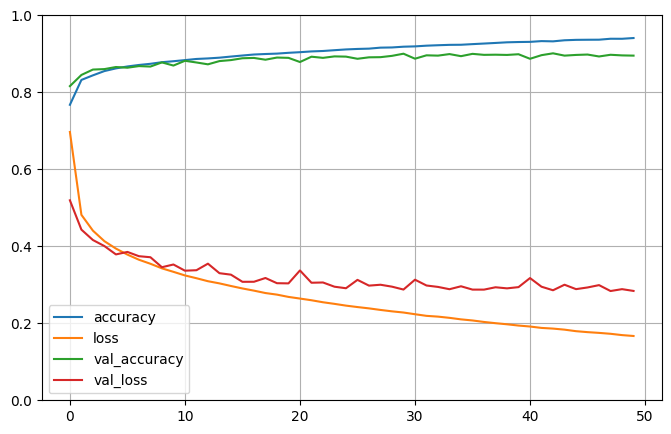

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 61.5305


[61.53046798706055, 0.8623999953269958]

In [ ]:
X_new = X_test[:3]
X_proba = model.predict(X_new)
X_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(X_proba, axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

## Regression


In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [61]:
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# housing = fetch_california_housing()
df = pd.read_csv(os.path.join(os.getcwd(), "datasets/housing/housing.csv"))

target = df["median_house_value"].values


df = df.drop("median_house_value", axis=1).drop("ocean_proximity", axis=1)
df = df.fillna(df.median())
data = df.values

display(df)

X_train_full, X_test, y_train_full, y_test = train_test_split(data, target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

y_train = y_train / 100000.0
y_valid = y_valid / 100000.0
y_test = y_test / 100000.0

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [62]:
print(X_train)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

[[-0.35509528  0.57884656  0.42346356 ... -0.43198873 -0.58035372
  -0.7638462 ]
 [-1.26467467  0.7702326  -1.39877955 ... -1.08703689 -1.12797207
   2.51811433]
 [-1.21994125  0.8869314  -1.79491935 ...  0.43543482  0.37133252
   0.14628265]
 ...
 [ 0.82288459 -0.84021087  0.7403754  ... -0.67572758 -0.58832875
  -0.3004944 ]
 [ 1.20560379 -1.34434969  0.66114744 ... -0.55027376 -0.0726105
  -0.59010252]
 [-1.28455618  0.96161863  0.58191948 ... -0.19900307 -0.31983626
   0.60365059]]
X_train shape: (11610, 8)
X_test shape: (5160, 8)


In [ ]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1),
    ]
)
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20


d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7946 - val_loss: 0.5147
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4937 - val_loss: 0.4647
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4624 - val_loss: 0.4614
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4449 - val_loss: 0.4311
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4323 - val_loss: 0.4229
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4258 - val_loss: 0.4170
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4189 - val_loss: 0.4042
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4121 - val_loss: 0.4083
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4082 - val_loss: 0.3986
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4044 - val_loss: 0.3926
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3993 - val_loss: 0.3895
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([[4.90601  ],
       [2.3223057],
       [1.9977243]], dtype=float32)

## functional api


In [ ]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

model.compile(loss="mse", optimizer="sgd")

In [ ]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer="sgd")
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(
    (X_train_A, X_train_B),
    y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid),
)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7436 - val_loss: 0.4786
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4645 - val_loss: 0.4527
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4427 - val_loss: 0.4265
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4307 - val_loss: 0.4103
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4217 - val_loss: 0.4100
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4148 - val_loss: 0.3951
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4095 - val_loss: 0.3950
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4057 - val_loss: 0.3917
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4019 - val_loss: 0.3952
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3993 - val_loss: 0.3885
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3958 - val_loss: 0.3841
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
y_pred

array([[4.4181094],
       [2.1092253],
       [2.185248 ]], dtype=float32)

In [ ]:
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [ ]:
history = model.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_10_loss: 0.3846 - dense_11_loss: 1.7090 - loss: 0.5171 - val_dense_10_loss: 0.3714 - val_dense_11_loss: 0.8498 - val_loss: 0.4192
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_10_loss: 0.3842 - dense_11_loss: 0.7227 - loss: 0.4181 - val_dense_10_loss: 0.3746 - val_dense_11_loss: 0.6613 - val_loss: 0.4033
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_10_loss: 0.3813 - dense_11_loss: 0.6322 - loss: 0.4064 - val_dense_10_loss: 0.3759 - val_dense_11_loss: 0.6063 - val_loss: 0.3989
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_10_loss: 0.3794 - dense_11_loss: 0.5963 - loss: 0.4012 - val_dense_10_loss: 0.3800 - val_dense_11_loss: 0.5803 - val_loss: 0.4000
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_10_loss: 0.3780 - dense_11_loss: 0.5744 - loss: 0.3977 - val_dense_10_loss: 0.3681 - val_dense_11_loss: 0.5568 - val_loss: 0.3869
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(total_loss)
print(main_loss)
print(aux_loss)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_10_loss: 0.3411 - dense_11_loss: 0.4392 - loss: 0.3510
0.3509543240070343
0.34111568331718445
0.4391724765300751


In [ ]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


In [ ]:
print(y_pred_main)
print(y_pred_aux)

[[4.241213 ]
 [2.0408933]
 [2.1640673]]
[[4.8645463]
 [1.6214123]
 [2.1620078]]


## dynamic models


In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_A = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


model = WideAndDeepModel()

## save and restoring a model


In [ ]:
model.save("my_keras_model.keras")

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\saving\saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [ ]:
model = keras.models.load_model("my_keras_model.keras")

TypeError: Could not locate class 'WideAndDeepModel'. Make sure custom classes and functions are decorated with `@keras.saving.register_keras_serializable()`. If they are already decorated, make sure they are all imported so that the decorator is run before trying to load them. Full object config: {'module': None, 'class_name': 'WideAndDeepModel', 'config': {'name': 'wide_and_deep_model', 'units': 30, 'activation': 'relu', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}}, 'registered_name': 'WideAndDeepModel', 'compile_config': {}}

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
327/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2055

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7274
Epoch 2/10
331/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4761

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4542
Epoch 3/10
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4336

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4224
Epoch 4/10
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4101

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4021
Epoch 5/10
323/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4023

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3886
Epoch 6/10
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3796

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3791
Epoch 7/10
335/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3628

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3720
Epoch 8/10
339/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3554

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3656
Epoch 9/10
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3798

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3614
Epoch 10/10
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3616

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3569


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_keras_model.keras", save_best_only=True
)
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb],
)
model = keras.models.load_model(
    "my_keras_model.keras",
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2782 - val_loss: 0.3095
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2771 - val_loss: 0.3078
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2779 - val_loss: 0.3139
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2767 - val_loss: 0.3098
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2774 - val_loss: 0.3155
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2770 - val_loss: 0.3066
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2769 - val_loss: 0.3084
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2758 - val_loss: 0.3109
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2755 - val_loss: 0.3094
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2764 - val_loss: 0.3266


d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=150,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb],
)
model = keras.models.load_model(
    "my_keras_model.keras",
)

Epoch 1/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2802 - val_loss: 0.3094
Epoch 2/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2788 - val_loss: 0.3179
Epoch 3/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2793 - val_loss: 0.3064
Epoch 4/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2768 - val_loss: 0.3094
Epoch 5/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2775 - val_loss: 0.3046
Epoch 6/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2771 - val_loss: 0.3116
Epoch 7/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2750 - val_loss: 0.3241
Epoch 8/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2749 - val_loss: 0.3075
Epoch 9/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2754 - val_loss: 0.3087
Epoch 10/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2729 - val_loss: 0.3004
Epoch 11/150
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2738 - val_loss: 0.3086
Epoch 12/150
363/363 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
class PrinValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train:{:.2f}".format(logs["val_loss"] / logs["loss"]))

## tensorboard


In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")


def get_run_logdir():
    import time

    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_logdir = get_run_logdir()

In [ ]:
from gc import callbacks


tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb],
)

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2717 - val_loss: 0.3010
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2700 - val_loss: 0.3215
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2690 - val_loss: 0.2995
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2687 - val_loss: 0.3080
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2687 - val_loss: 0.3041
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2680 - val_loss: 0.2971
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2678 - val_loss: 0.3019
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2667 - val_loss: 0.3118
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2679 - val_loss: 0.3129
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2653 - val_loss: 0.2982
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2665 - val_loss: 0.3045
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## fine-tuning hyperparameters


In [58]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [ ]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model, learning_rate=0.01)

In [71]:
keras_reg.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)],
)


Epoch 1/100


d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8111 - val_loss: 0.4683
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4594 - val_loss: 0.4198
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4307 - val_loss: 0.4035
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4170 - val_loss: 0.3922
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4089 - val_loss: 0.3903
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4043 - val_loss: 0.3825
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3994 - val_loss: 0.3778
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3950 - val_loss: 0.3862
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3923 - val_loss: 0.3709
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3891 - val_loss: 0.3685
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3860 - val_loss: 0.3686
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

,model,<function bui...001A40C740160>
,build_fn,None
,warm_start,False
,random_state,None
,optimizer,'rmsprop'
,loss,None
,metrics,None
,batch_size,None
,validation_batch_size,None
,verbose,1
,callbacks,None


In [72]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal


params_distribs = {
    "model__n_hidden": [0, 1, 2, 3],
    "model__n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, params_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)],
)

Epoch 1/100


d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2953 - val_loss: 0.6910
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6149 - val_loss: 0.5423
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5155 - val_loss: 0.4705
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4678 - val_loss: 0.4328
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4408 - val_loss: 0.4116
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4234 - val_loss: 0.3966
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4108 - val_loss: 0.3886
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4010 - val_loss: 0.3794
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3933 - val_loss: 0.3792
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3863 - val_loss: 0.3688
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3817 - val_loss: 0.3677
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1726 - val_loss: 0.6739
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6091 - val_loss: 0.5419
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5235 - val_loss: 0.4781
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4760 - val_loss: 0.4387
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4469 - val_loss: 0.4140
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4276 - val_loss: 0.3985
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4143 - val_loss: 0.3922
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4046 - val_loss: 0.3818
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3982 - val_loss: 0.3728
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3915 - val_loss: 0.3701
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3864 - val_loss: 0.3676
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3503 - val_loss: 0.6852
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6246 - val_loss: 0.5541
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5348 - val_loss: 0.4832
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4835 - val_loss: 0.4417
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4506 - val_loss: 0.4194
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4287 - val_loss: 0.3992
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4132 - val_loss: 0.3856
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4035 - val_loss: 0.3898
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3964 - val_loss: 0.3718
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3909 - val_loss: 0.3694
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3863 - val_loss: 0.3712
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5915 - val_loss: 0.4051
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4074 - val_loss: 0.3744
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3878 - val_loss: 0.3692
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3748 - val_loss: 0.3647
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3567 - val_loss: 0.3374
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3529 - val_loss: 0.3356
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3398 - val_loss: 0.3515
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3351 - val_loss: 0.3099
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3276 - val_loss: 0.3570
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3289 - val_loss: 0.4341
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3187 - val_loss: 0.3047
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5894 - val_loss: 0.4461
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4146 - val_loss: 0.3684
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3912 - val_loss: 0.3767
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3789 - val_loss: 0.4452
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3660 - val_loss: 0.3326
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3548 - val_loss: 0.3361
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3505 - val_loss: 0.3356
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3446 - val_loss: 0.3228
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3367 - val_loss: 0.3230
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3324 - val_loss: 0.3138
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3252 - val_loss: 0.2975
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5813 - val_loss: 0.4100
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4111 - val_loss: 0.3521
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3871 - val_loss: 0.3483
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3737 - val_loss: 0.3388
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3588 - val_loss: 0.3420
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3477 - val_loss: 0.3271
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3459 - val_loss: 0.3432
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3339 - val_loss: 0.3234
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3365 - val_loss: 0.3144
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3272 - val_loss: 0.3042
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3301 - val_loss: 0.3106
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2504 - val_loss: 0.6439
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5964 - val_loss: 0.5438
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5217 - val_loss: 0.4834
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4775 - val_loss: 0.4463
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4471 - val_loss: 0.4226
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4269 - val_loss: 0.4042
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4131 - val_loss: 0.3934
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4039 - val_loss: 0.3835
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3964 - val_loss: 0.3779
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3910 - val_loss: 0.3730
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3861 - val_loss: 0.3701
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3843 - val_loss: 0.6965
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6393 - val_loss: 0.5693
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5521 - val_loss: 0.5083
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5038 - val_loss: 0.4672
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4717 - val_loss: 0.4378
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4485 - val_loss: 0.4175
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4310 - val_loss: 0.4043
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4177 - val_loss: 0.3900
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4082 - val_loss: 0.3820
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4009 - val_loss: 0.3734
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3947 - val_loss: 0.3734
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3105 - val_loss: 0.7165
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6552 - val_loss: 0.5960
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5687 - val_loss: 0.5351
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5179 - val_loss: 0.4881
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4846 - val_loss: 0.4570
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4606 - val_loss: 0.4357
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4430 - val_loss: 0.4183
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4283 - val_loss: 0.4047
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4174 - val_loss: 0.3952
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4096 - val_loss: 0.3885
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4028 - val_loss: 0.3803
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7665 - val_loss: 2.8510
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9585 - val_loss: 1.3539
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0560 - val_loss: 0.8392
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7392 - val_loss: 0.6516
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6214 - val_loss: 0.5797
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5749 - val_loss: 0.5500
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5548 - val_loss: 0.5360
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5446 - val_loss: 0.5282
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5386 - val_loss: 0.5225
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5343 - val_loss: 0.5184
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5308 - val_loss: 0.5147
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.3641 - val_loss: 2.9552
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0264 - val_loss: 1.3852
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0885 - val_loss: 0.8565
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7621 - val_loss: 0.6688
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6428 - val_loss: 0.5975
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5956 - val_loss: 0.5679
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5743 - val_loss: 0.5526
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5623 - val_loss: 0.5429
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5543 - val_loss: 0.5356
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5478 - val_loss: 0.5295
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5424 - val_loss: 0.5241
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8579 - val_loss: 2.9869
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1037 - val_loss: 1.4864
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1885 - val_loss: 0.9649
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8598 - val_loss: 0.7705
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7328 - val_loss: 0.6918
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6775 - val_loss: 0.6540
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6490 - val_loss: 0.6318
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6311 - val_loss: 0.6161
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6176 - val_loss: 0.6038
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6065 - val_loss: 0.5925
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5969 - val_loss: 0.5825
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0662 - val_loss: 0.6723
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6075 - val_loss: 0.5526
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5271 - val_loss: 0.4885
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4816 - val_loss: 0.4510
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4533 - val_loss: 0.4318
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4353 - val_loss: 0.4133
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4220 - val_loss: 0.4020
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4121 - val_loss: 0.3921
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4041 - val_loss: 0.3859
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3972 - val_loss: 0.3831
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3930 - val_loss: 0.3758
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1565 - val_loss: 0.7032
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6402 - val_loss: 0.5765
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5510 - val_loss: 0.5025
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4979 - val_loss: 0.4623
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4652 - val_loss: 0.4351
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4438 - val_loss: 0.4174
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4296 - val_loss: 0.4014
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4179 - val_loss: 0.3940
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4109 - val_loss: 0.3865
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4046 - val_loss: 0.3808
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4000 - val_loss: 0.3772
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2583 - val_loss: 0.7325
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6481 - val_loss: 0.5854
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5530 - val_loss: 0.5092
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5002 - val_loss: 0.4619
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4658 - val_loss: 0.4341
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4440 - val_loss: 0.4143
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4287 - val_loss: 0.4029
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4180 - val_loss: 0.3928
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4100 - val_loss: 0.3860
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4043 - val_loss: 0.3821
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3982 - val_loss: 0.3780
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0405 - val_loss: 1.5370
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1824 - val_loss: 0.9516
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8594 - val_loss: 0.7648
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7325 - val_loss: 0.6794
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6641 - val_loss: 0.6265
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6179 - val_loss: 0.5886
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5834 - val_loss: 0.5596
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5565 - val_loss: 0.5370
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5361 - val_loss: 0.5171
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5192 - val_loss: 0.5012
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5053 - val_loss: 0.4883
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4987 - val_loss: 1.7083
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2641 - val_loss: 1.0232
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9258 - val_loss: 0.8296
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7922 - val_loss: 0.7348
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7217 - val_loss: 0.6828
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6794 - val_loss: 0.6497
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6497 - val_loss: 0.6257
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6267 - val_loss: 0.6044
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6075 - val_loss: 0.5871
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5907 - val_loss: 0.5712
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5758 - val_loss: 0.5565
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2262 - val_loss: 1.1444
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9630 - val_loss: 0.8420
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7950 - val_loss: 0.7378
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7174 - val_loss: 0.6783
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6662 - val_loss: 0.6346
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6272 - val_loss: 0.6002
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5955 - val_loss: 0.5699
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5687 - val_loss: 0.5452
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5463 - val_loss: 0.5229
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5272 - val_loss: 0.5051
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5108 - val_loss: 0.4892
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0259 - val_loss: 0.8626
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7670 - val_loss: 0.6969
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6744 - val_loss: 0.6515
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6307 - val_loss: 0.6087
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5959 - val_loss: 0.5737
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5641 - val_loss: 0.5378
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5432 - val_loss: 0.5120
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5216 - val_loss: 0.4899
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5014 - val_loss: 0.4730
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4877 - val_loss: 0.4595
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4772 - val_loss: 0.4504
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5649 - val_loss: 0.9316
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8032 - val_loss: 0.6982
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6588 - val_loss: 0.6114
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5923 - val_loss: 0.5580
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5554 - val_loss: 0.5270
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5296 - val_loss: 0.5035
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5089 - val_loss: 0.4824
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4908 - val_loss: 0.4636
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4760 - val_loss: 0.4500
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4651 - val_loss: 0.4404
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4558 - val_loss: 0.4332
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3514 - val_loss: 0.8394
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7302 - val_loss: 0.6381
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6088 - val_loss: 0.5542
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5395 - val_loss: 0.5027
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4981 - val_loss: 0.4685
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4759 - val_loss: 0.4496
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4617 - val_loss: 0.4446
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4542 - val_loss: 0.4312
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4477 - val_loss: 0.4280
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4434 - val_loss: 0.4228
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4399 - val_loss: 0.4187
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0621 - val_loss: 1.5155
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0812 - val_loss: 0.8360
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7497 - val_loss: 0.6917
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6707 - val_loss: 0.6460
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6390 - val_loss: 0.6208
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6182 - val_loss: 0.6011
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6017 - val_loss: 0.5851
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5877 - val_loss: 0.5714
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5760 - val_loss: 0.5597
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5660 - val_loss: 0.5497
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5572 - val_loss: 0.5408
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d:\software\anaconda\envs\AI-related\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6185 - val_loss: 1.6106
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1023 - val_loss: 0.7968
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7157 - val_loss: 0.6463
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6341 - val_loss: 0.6058
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6057 - val_loss: 0.5839
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5881 - val_loss: 0.5681
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5745 - val_loss: 0.5548
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5631 - val_loss: 0.5435
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5534 - val_loss: 0.5337
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5448 - val_loss: 0.5254
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5376 - val_loss: 0.5181
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model